# 梯度下降法 (Gradient Descent)
- https://ithelp.ithome.com.tw/articles/10198147?sc=rss.iron

## 先確認是否有 GPU

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## 範例1
- 假定目標函數 f(x) = $x^2$
- 使用梯度下降法求取最小值

### 載入套件

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 目標函數(損失函數)及其一階導數

In [3]:
def func(x):
    return x**2

def dfunc(x):
    return 2 * x

### 梯度下降
- x 更新公式:
  - x_new = x - learning_rate * gradient

In [4]:
def GD(x_start, df, epochs, lr):
    xs = np.zeros(epochs + 1)
    x = x_start
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        x += -dx * lr
        xs[i+1] = x
    return xs

### 梯度下降法 (Gradient Descent)
- 畫切線

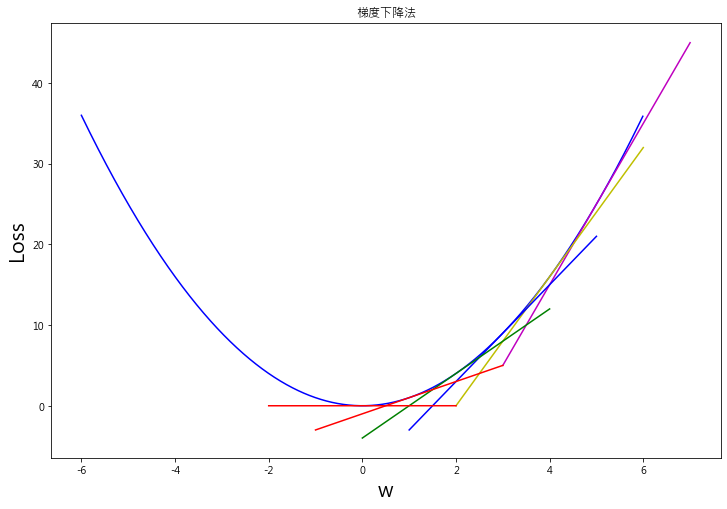

In [5]:
# 設定超參數
x_start = 5
epochs = 15
lr = 0.13

# 梯度下降法
#*** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr)

color = "r"

plt.figure(figsize = (12, 8))
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c="b")

# 設定中文字型
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

plt.title('梯度下降法')
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

color = list("rgbymr")  # 切線顏色
line_offset = 2         # 切線長度
for i in range(5, -1, -1):
    # 取相近兩個點, 畫切線
    z=np.array([i+0.001, i])
    vec=np.vectorize(func)
    cls = np.polyfit(z, vec(z), deg=1)
    p = np.poly1d(cls)
    
    # 畫切線
    x=np.array([i+line_offset, i-line_offset])
    y=np.array([(i+line_offset)*p[1]+p[0], (i-line_offset)*p[1]+p[0]])
    plt.plot(x, y, c=color[i-1])    

plt.show()

## 執行梯度下降法 (Geadient Descent)

[-5.   -2.   -0.8  -0.32 -0.13 -0.05 -0.02 -0.01 -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.  ]


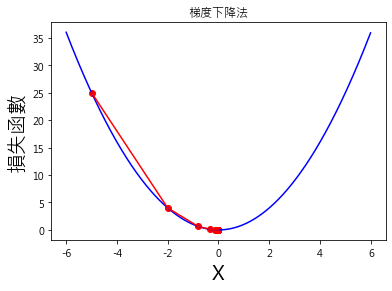

In [20]:
# 超參數(Hyperparameters)
x_start = -5     # 起始權重
epochs = 15
lr = 0.3

# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 
print (np.around(w, 2))

color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, func(w), c=color, ) 

# 設定中文字型
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 微軟正黑體
# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

plt.title('梯度下降法')
plt.xlabel('X', fontsize=20)
plt.ylabel('損失函數', fontsize=20)
plt.show()